In [1]:
import pandas as pd
import numpy as np

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final data\\'

#Loading Date to week id map

data= pd.read_excel(loc + 'Inventory_final.xlsx', index_col=False)
data.head()

date  product_identifier  department_identifier  \
0 2020-01-01                  74                     11   
1 2020-01-01                 337                     11   
2 2020-01-01                 423                     12   
3 2020-01-01                 432                     12   
4 2020-01-01                 581                     21   

          category_of_product  outlet        state  sales  week_id  \
0                      others     111  Maharashtra      0       49   
1                      others     111  Maharashtra      1       49   
2                      others     111  Maharashtra      0       49   
3                      others     111  Maharashtra      0       49   
4  fast_moving_consumer_goods     111  Maharashtra      0       49   

   sell_price year_month  net Sales  Temperature  Holiday  
0        2.94    2012-01       0.00           26        0  
1        7.44    2012-01       7.44           26        0  
2        0.97    2012-01       0.00           26        0  
3        4.97    2012-01       0.00           26        0  
4        4.88    2012-01       0.00           26        0

In [3]:
import copy
data2= copy.deepcopy(data)

In [4]:
data2= data2.rename(columns={'product_identifier': 'Product_ID','department_identifier': 'Sub_Category',\
                           'category_of_product': 'Product_Category', 'outlet': 'Store', 'net Sales': 'Total_Sales', \
                          'sales': 'Units_Sold', 'sell_price': 'Unit_Price'})
data2.head()

date  Product_ID  Sub_Category            Product_Category  Store  \
0 2020-01-01          74            11                      others    111   
1 2020-01-01         337            11                      others    111   
2 2020-01-01         423            12                      others    111   
3 2020-01-01         432            12                      others    111   
4 2020-01-01         581            21  fast_moving_consumer_goods    111   

         state  Units_Sold  week_id  Unit_Price year_month  Total_Sales  \
0  Maharashtra           0       49        2.94    2012-01         0.00   
1  Maharashtra           1       49        7.44    2012-01         7.44   
2  Maharashtra           0       49        0.97    2012-01         0.00   
3  Maharashtra           0       49        4.97    2012-01         0.00   
4  Maharashtra           0       49        4.88    2012-01         0.00   

   Temperature  Holiday  
0           26        0  
1           26        0  
2           26        0  
3           26        0  
4           26        0

In [5]:
#!pip install xgboost

In [6]:
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

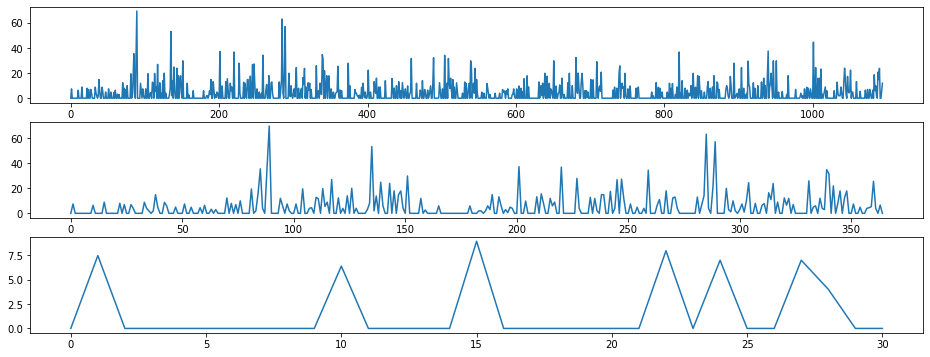

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(3, 1, 1)
plt.plot(data2.Total_Sales[:365*3])
plt.subplot(3, 1, 2)
plt.plot(data2.Total_Sales[:365])

plt.subplot(3, 1, 3)
plt.plot(data2.Total_Sales[:31])
plt.show()


In [8]:
rolling_mean = data2.Total_Sales.rolling(window=7).mean()
print(rolling_mean.shape)
print(rolling_mean[:31])

(158000,)
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     1.062857
7     1.062857
8     0.000000
9     0.000000
10    0.910000
11    0.910000
12    0.910000
13    0.910000
14    0.910000
15    2.182857
16    2.182857
17    1.272857
18    1.272857
19    1.272857
20    1.272857
21    1.272857
22    1.134286
23    1.134286
24    2.130000
25    2.130000
26    2.130000
27    3.125714
28    3.697143
29    2.562857
30    2.562857
Name: Total_Sales, dtype: float64


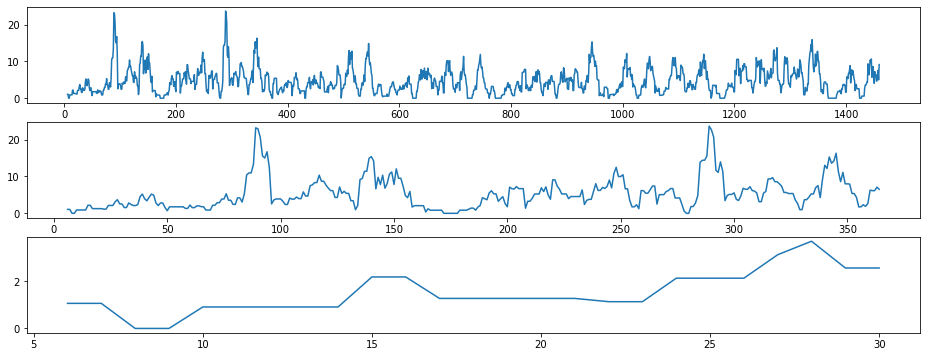

In [9]:
rolling_mean = data2.Total_Sales.rolling(window=7).mean()

plt.figure(figsize=(16,6))
plt.subplot(3, 1, 1)
plt.plot(rolling_mean[:365*4])
plt.subplot(3, 1, 2)
plt.plot(rolling_mean[:365])

plt.subplot(3, 1, 3)
plt.plot(rolling_mean[:31])
plt.show()

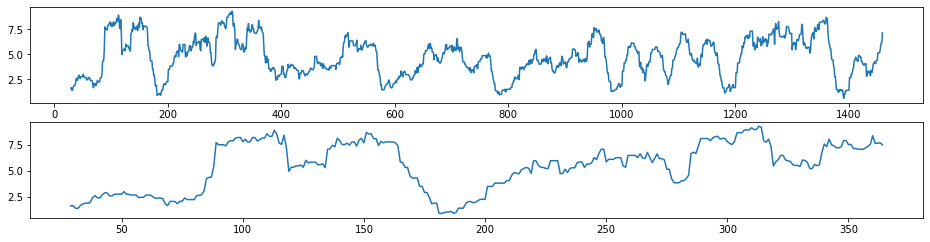

In [10]:
rolling_mean2 = data2.Total_Sales.rolling(window=30).mean()

plt.figure(figsize=(16,6))
plt.subplot(3, 1, 1)
plt.plot(rolling_mean2[:365*4])
plt.subplot(3, 1, 2)
plt.plot(rolling_mean2[:365])

plt.show()

In [11]:
data2.columns

Index(['date', 'Product_ID', 'Sub_Category', 'Product_Category', 'Store',
       'state', 'Units_Sold', 'week_id', 'Unit_Price', 'year_month',
       'Total_Sales', 'Temperature', 'Holiday'],
      dtype='object')

In [12]:
data2= data2[['date', 'Product_ID', 'Sub_Category', 'Product_Category', 'Store',
       'state', 'Units_Sold', 'Unit_Price',
       'Total_Sales', 'Temperature', 'Holiday']]

In [13]:
data2['date'] = pd.to_datetime(data2['date'],infer_datetime_format=True)


data2['month'] = data2['date'].dt.month
data2['weekday'] = data2['date'].dt.dayofweek
data2['year'] = data2['date'].dt.year
# df['date'].dt.
data2['week_of_year']  = data2.date.dt.weekofyear

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_8528\1871634573.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data2['week_of_year']  = data2.date.dt.weekofyear


In [14]:
data2.head()

date  Product_ID  Sub_Category            Product_Category  Store  \
0 2020-01-01          74            11                      others    111   
1 2020-01-01         337            11                      others    111   
2 2020-01-01         423            12                      others    111   
3 2020-01-01         432            12                      others    111   
4 2020-01-01         581            21  fast_moving_consumer_goods    111   

         state  Units_Sold  Unit_Price  Total_Sales  Temperature  Holiday  \
0  Maharashtra           0        2.94         0.00           26        0   
1  Maharashtra           1        7.44         7.44           26        0   
2  Maharashtra           0        0.97         0.00           26        0   
3  Maharashtra           0        4.97         0.00           26        0   
4  Maharashtra           0        4.88         0.00           26        0   

   month  weekday  year  week_of_year  
0      1        2  2020             1  
1      1        2  2020             1  
2      1        2  2020             1  
3      1        2  2020             1  
4      1        2  2020             1

In [15]:
data2['date_order'] = (data2['date'] - datetime.datetime(2020, 1, 1)).dt.days
data2

date  Product_ID  Sub_Category            Product_Category  \
0      2020-01-01          74            11                      others   
1      2020-01-01         337            11                      others   
2      2020-01-01         423            12                      others   
3      2020-01-01         432            12                      others   
4      2020-01-01         581            21  fast_moving_consumer_goods   
...           ...         ...           ...                         ...   
157995 2022-02-28        2932            33             drinks_and_food   
157996 2022-02-28        2935            33             drinks_and_food   
157997 2022-02-28        3004            33             drinks_and_food   
157998 2022-02-28        3008            33             drinks_and_food   
157999 2022-02-28        3021            33             drinks_and_food   

        Store        state  Units_Sold  Unit_Price  Total_Sales  Temperature  \
0         111  Maharashtra           0        2.94         0.00           26   
1         111  Maharashtra           1        7.44         7.44           26   
2         111  Maharashtra           0        0.97         0.00           26   
3         111  Maharashtra           0        4.97         0.00           26   
4         111  Maharashtra           0        4.88         0.00           26   
...       ...          ...         ...         ...          ...          ...   
157995    114  Maharashtra           4        2.78        11.12           26   
157996    114  Maharashtra           0        0.20         0.00           26   
157997    114  Maharashtra           0        2.50         0.00           26   
157998    114  Maharashtra           2        1.98         3.96           26   
157999    114  Maharashtra           0        2.08         0.00           26   

        Holiday  month  weekday  year  week_of_year  date_order  
0             0      1        2  2020             1           0  
1             0      1        2  2020             1           0  
2             0      1        2  2020             1           0  
3             0      1        2  2020             1           0  
4             0      1        2  2020             1           0  
...         ...    ...      ...   ...           ...         ...  
157995        0      2        0  2022             9         789  
157996        0      2        0  2022             9         789  
157997        0      2        0  2022             9         789  
157998        0      2        0  2022             9         789  
157999        0      2        0  2022             9         789  

[158000 rows x 16 columns]

In [16]:
data2['sale_moving_average_7days']=data2.groupby(["Product_ID","Store"])['Total_Sales'].transform(lambda x: x.rolling(window=7,min_periods=1).mean())


In [17]:
#data2.head(10)

In [18]:
data2['sale_moving_average_7days_shifted-90']=data2.groupby(["Product_ID","Store"])\
['sale_moving_average_7days'].transform(lambda x:x.shift(90))

In [19]:
data2.head()

date  Product_ID  Sub_Category            Product_Category  Store  \
0 2020-01-01          74            11                      others    111   
1 2020-01-01         337            11                      others    111   
2 2020-01-01         423            12                      others    111   
3 2020-01-01         432            12                      others    111   
4 2020-01-01         581            21  fast_moving_consumer_goods    111   

         state  Units_Sold  Unit_Price  Total_Sales  Temperature  Holiday  \
0  Maharashtra           0        2.94         0.00           26        0   
1  Maharashtra           1        7.44         7.44           26        0   
2  Maharashtra           0        0.97         0.00           26        0   
3  Maharashtra           0        4.97         0.00           26        0   
4  Maharashtra           0        4.88         0.00           26        0   

   month  weekday  year  week_of_year  date_order  sale_moving_average_7days  \
0      1        2  2020             1           0                       0.00   
1      1        2  2020             1           0                       7.44   
2      1        2  2020             1           0                       0.00   
3      1        2  2020             1           0                       0.00   
4      1        2  2020             1           0                       0.00   

   sale_moving_average_7days_shifted-90  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [20]:
col = [i for i in data2.columns if i not in ['date','id','Sub_Category', 'Product_Category', 'state','sale_moving_average_7days']]

In [21]:
col

['Product_ID',
 'Store',
 'Units_Sold',
 'Unit_Price',
 'Total_Sales',
 'Temperature',
 'Holiday',
 'month',
 'weekday',
 'year',
 'week_of_year',
 'date_order',
 'sale_moving_average_7days_shifted-90']

In [22]:
data_filter1 = data2.loc[data2['Units_Sold'] != 0]
data_filter2 = data2.loc[data2['Units_Sold']==0]


In [23]:
#data2[data2['Units_Sold'] == 0 ]

In [24]:
data_filter1.shape, data_filter2.shape

((64557, 18), (93443, 18))

In [25]:
data_filter1['Units_Sold']

1         1
10        1
15        3
22        2
24        1
         ..
157990    1
157992    1
157994    6
157995    4
157998    2
Name: Units_Sold, Length: 64557, dtype: int64

In [26]:
data_filter2['Units_Sold']

0         0
2         0
3         0
4         0
5         0
         ..
157991    0
157993    0
157996    0
157997    0
157999    0
Name: Units_Sold, Length: 93443, dtype: int64

In [27]:
train_new = (data_filter1[col]).dropna()

In [28]:
train_new.shape

(57247, 13)

In [29]:
train_new.columns

Index(['Product_ID', 'Store', 'Units_Sold', 'Unit_Price', 'Total_Sales',
       'Temperature', 'Holiday', 'month', 'weekday', 'year', 'week_of_year',
       'date_order', 'sale_moving_average_7days_shifted-90'],
      dtype='object')

In [30]:
train_new['Units_Sold']

18000     2
18004     4
18006     4
18007     2
18009     7
         ..
157990    1
157992    1
157994    6
157995    4
157998    2
Name: Units_Sold, Length: 57247, dtype: int64

In [31]:
y_target = train_new['Units_Sold']
col = [i for i in data2.columns if i not in ['date','Product_ID','Units_Sold', 'Sub_Category', 'Product_Category', 'state','sale_moving_average_7days']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split( train_new[col] ,train_new['Units_Sold'], test_size=0.15, random_state=42)

In [33]:
X_train.head()

Store  Unit_Price  Total_Sales  Temperature  Holiday  month  weekday  \
128233    111        0.98         5.88           27        0     10        6   
123787    114        1.97         1.97           28        0      9        4   
83038     111        2.97         2.97           28        1      2        4   
84996     114        0.20         1.60           30        0      2        6   
106546    113        0.20         2.60           28        0      6        2   

        year  week_of_year  date_order  sale_moving_average_7days_shifted-90  
128233  2021            39         641                          1.064000e+01  
123787  2021            36         618                          1.688571e+00  
83038   2021             7         415                          3.521571e+01  
84996   2021             8         424                          6.285714e-01  
106546  2021            24         532                          5.075305e-16

In [34]:
y_train.head()

128233     6
123787     1
83038      1
84996      8
106546    13
Name: Units_Sold, dtype: int64

In [35]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [36]:
model_sets=[]

for max_depth in range(4,17,3):
    xgb_model = xgb.XGBRegressor(max_depth=max_depth ,min_child_weight=1)
    #xgb_model.fit(X_train,y_train,eval_metric='mae')
    xgb_model.fit(X_train,y_train.values,eval_metric=smape)
    model_sets.append(xgb_model)
    y_train_pred_xgb=xgb_model.predict(X_train)
    y_test_pred_xgb=xgb_model.predict(X_test)
    print('smape error: max_depth=', max_depth ,',train:' , smape(y_train.values,y_train_pred_xgb),'test:',smape(y_test.values,y_test_pred_xgb))
    print('MSE train:' , mean_absolute_error(np.log1p(y_train),np.log1p(y_train_pred_xgb)),'test:',mean_absolute_error(np.log1p(y_test),np.log1p(y_test_pred_xgb)))

C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 4 ,train: 1.1252187708786394 test: 1.1603542424970839
MSE train: 0.007739688364005048 test: 0.008032769798188151


C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 7 ,train: 0.05742828946606632 test: 0.08423568904270955
MSE train: 0.000422402253287525 test: 0.0006679485600066302


C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 10 ,train: 0.0028985473959578442 test: 0.02621774357570209
MSE train: 2.1447266491987413e-05 test: 0.0002386551233755373


C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 13 ,train: 0.0010213464524606248 test: 0.026171260679922714
MSE train: 7.3860278990337955e-06 test: 0.00024116715819950824


C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 16 ,train: 0.0006490111847936735 test: 0.025575424111674516
MSE train: 4.395668789204458e-06 test: 0.00023604384796299988


In [37]:

model_sets[2]
model_sets[2].fit(train_new[col],y_target,eval_metric=smape)

y_train_pred_xgb=model_sets[2].predict(X_train)
y_test_pred_xgb=model_sets[2].predict(X_test)
print('smape error: max_depth=', max_depth ,',train:' , smape(y_train.values,y_train_pred_xgb),'test:',smape(y_test.values,y_test_pred_xgb))
print('MSE train:' , mean_absolute_error(np.log1p(y_train),np.log1p(y_train_pred_xgb)),'test:',mean_absolute_error(np.log1p(y_test),np.log1p(y_test_pred_xgb)))

C:\Users\Ramshankar\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


smape error: max_depth= 16 ,train: 0.00288269630370303 test: 0.0029808080502277674
MSE train: 2.17177026498074e-05 test: 2.255495646546331e-05


In [39]:
# Choose the model which provides less smape
y_submission=np.rint(model_sets[2].predict(data_filter2[col]))
#y_submission=xgb_model.predict(test_new[col])

In [40]:
y_submission

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [42]:
final = pd.DataFrame(list(zip(data_filter2['Product_ID'], data_filter2['Store'], y_submission)), 
               columns =['Product_ID', 'Store', 'Prediction']) 

In [43]:
final

Product_ID  Store  Prediction
0              74    111         1.0
1             423    111         1.0
2             432    111         1.0
3             581    111         1.0
4             611    111         1.0
...           ...    ...         ...
93438        2768    114         1.0
93439        2818    114         1.0
93440        2935    114         1.0
93441        3004    114         1.0
93442        3021    114         1.0

[93443 rows x 3 columns]

In [135]:
#final.to_excel('Prediction_store.xlsx', index= False)